In [2]:
import sys
sys.path.append('../../')
from ML_toolbox import *

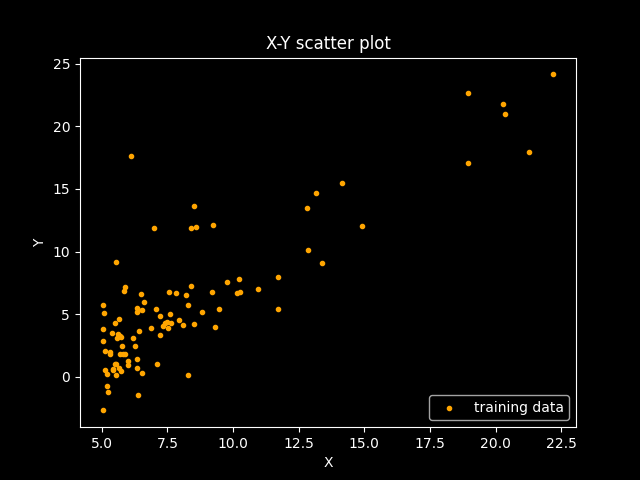

Iteration #0: cost=32.07	w=0	b=0.00, 
Iteration #100: cost=5.13	w=[0.9246112]	b=-1.22, 
Iteration #200: cost=4.77	w=[1.01262897]	b=-2.10, 
Iteration #300: cost=4.61	w=[1.07178504]	b=-2.69, 
Iteration #400: cost=4.54	w=[1.11154339]	b=-3.08, 
Iteration #500: cost=4.50	w=[1.13826466]	b=-3.35, 
Iteration #600: cost=4.49	w=[1.15622383]	b=-3.53, 
Iteration #700: cost=4.48	w=[1.16829405]	b=-3.65, 
Iteration #800: cost=4.48	w=[1.17640635]	b=-3.73, 
Iteration #900: cost=4.48	w=[1.18185857]	b=-3.78, 
Iteration #1000: cost=4.48	w=[1.18552296]	b=-3.82, 
Optimal parameters: Iteration 1000, cost: 4.477480231721618, optimal w: [1.18552296], optimal b: -3.821018585529105


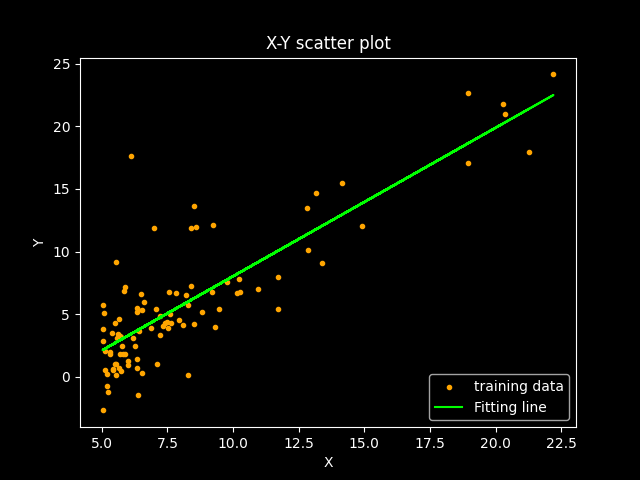

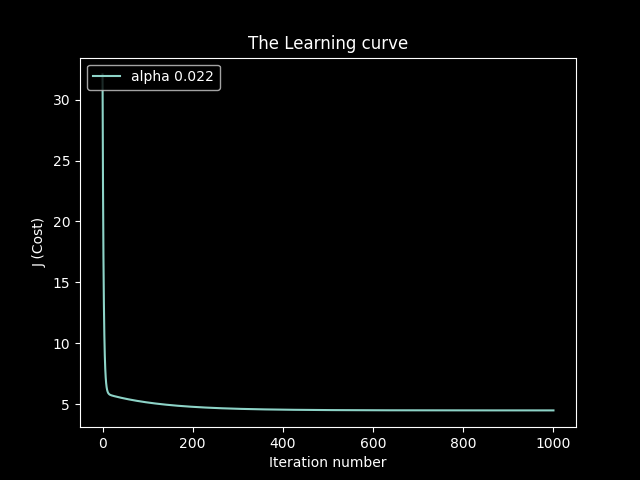

In [4]:
## Linear Regression one feature
##----------------
# Read and plot training data
X_train, Y_train = read_data('./data/linear_regression_data.txt', feature_count=1)
plot_linear_data(X_train, Y_train)

# Find optimal w and b using Gradient Descent
initial_w = 0
initial_b = 0
alpha = 0.022
optimal_w, optimal_b, GD_log = gradient_descent(X_train, Y_train, initial_w, initial_b, alpha, iteration_count=1000, lambda_reg=0, log_verbosity=100, logistic=False)

# Plot training data with the fitting line
Y_hat = prediction_function(X_train, optimal_w, optimal_b)
plot_linear_data(X_train, Y_train, fit_data=Y_hat)

# Learning curve (iteration count VS J)
plt.title("The Learning curve")
plt.xlabel('Iteration number')
plt.ylabel('J (Cost)')
plt.plot(GD_log[:,0], GD_log[:,1], label=f'alpha {alpha}')
plt.legend(loc='upper left')
plt.show()

# Cost functio plane over varying w and b: from the my_linear_regression_test file


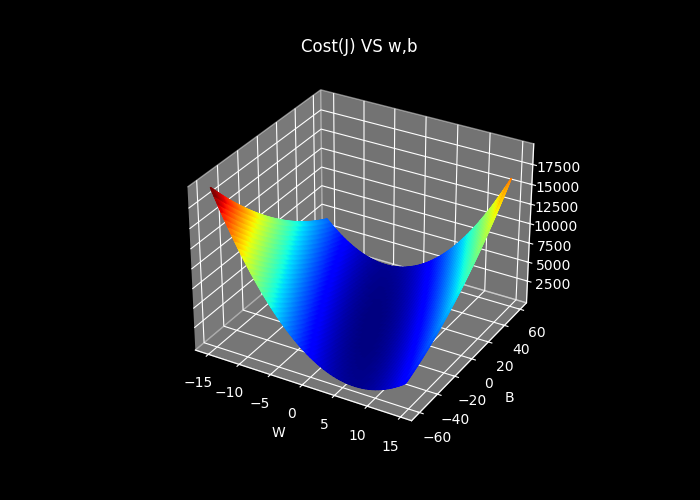

In [14]:
## Plot J against different w, b choices
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import colors
from matplotlib import cm

FIG = plt.figure(figsize=(7, 5))
plt.style.use('dark_background')
FIG.patch.set_facecolor('black')

AX = FIG.add_subplot(projection='3d')

W = np.arange(-15,15,0.5)
B = np.arange(-60,60,0.5)
W, B = np.meshgrid(W,B)

J = np.zeros((W.shape))
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Y_hat = prediction_function(X_train, W[i,j], B[i,j])
        J[i,j] = linear_regression_cost_function(Y_hat, Y_train)

color_dimension = J
min, max = color_dimension.min(), color_dimension.max()
norm = colors.Normalize(min, max)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])

fcolors = m.to_rgba(color_dimension)
surf = AX.plot_surface(W,B,J,rstride=1, cstride=1, facecolors=fcolors, vmin=min, vmax=max, shade=False)
plt.title("Cost(J) VS w,b")
plt.xlabel('W')
plt.ylabel('B')
#plt.zlabel('Cost(J)')
plt.show()